# Microsoft Stock Price Prediction with Machine Learning

## Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

sns.set()

plt.style.use('fivethirtyeight')


In [5]:
data = pd.read_csv('Microsoft_data.csv', index_col=0, parse_dates=True)

In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-11 00:00:00-05:00,244.779999,245.149994,242.149994,244.490005,240.206863,15751100
2021-02-12 00:00:00-05:00,243.929993,245.300003,242.729996,244.990005,240.698090,16561100
2021-02-16 00:00:00-05:00,245.029999,246.130005,242.919998,243.699997,239.430695,26728500
2021-02-17 00:00:00-05:00,241.320007,244.309998,240.940002,244.199997,240.474518,21653500
2021-02-18 00:00:00-05:00,241.800003,243.929993,240.860001,243.789993,240.070786,16925600


In [9]:
data.shape

(496, 6)

In [7]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,496.000000,496.000000,496.000000,496.000000,496.000000,4.960000e+02
mean,273.379173,276.275746,270.342137,273.443387,271.162595,2.865241e+07
std,31.353399,31.294289,31.052639,31.236118,30.686463,1.024717e+07
min,217.550003,220.410004,213.429993,214.250000,213.647903,9.200800e+06
25%,245.640003,248.730003,243.715000,247.029999,244.625000,2.192490e+07
50%,267.994995,271.744995,265.315002,268.729996,267.359909,2.648395e+07
75%,296.369987,299.829994,293.715012,296.454994,293.637985,3.317075e+07
max,344.619995,349.670013,342.200012,343.109985,339.924835,9.042890e+07


## Visualizing the dataset


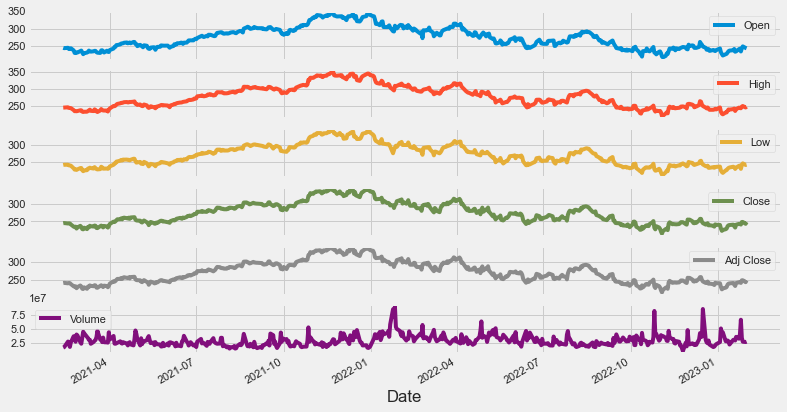

In [11]:
data.plot(subplots=True, grid=True, figsize=(12,7))
plt.show()

In [12]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In this dataset, the Close Column contains the values whose future values we want to predict. So lets have a closer look at the historical close prices of Microsoft's stock price:

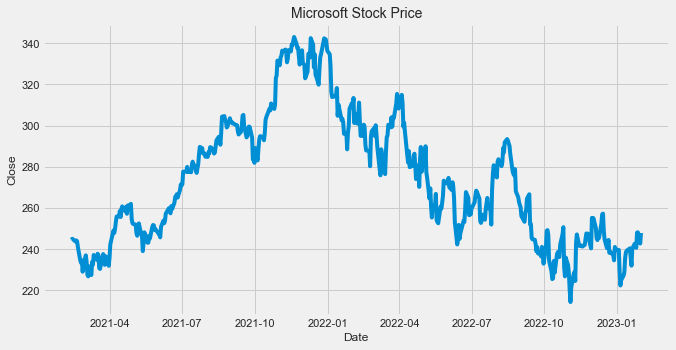

In [13]:
plt.figure(figsize=(10,5))
plt.title('Microsoft Stock Price', size=14)
plt.xlabel('Date', size=12)
plt.ylabel("Close", size=12)
plt.plot(data["Close"])
plt.show()

### lets have a look at the correlation between the features of this dataset

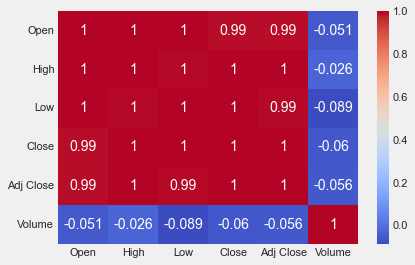

In [14]:
corr = data.corr()
sns.heatmap(corr , annot=True,cmap='coolwarm')
plt.show()

### Preparing the data to fit the machine learning model

X = features

Y= Target

In [20]:

X  = data[['Open','High','Low']].values
Y = data['Close'].values

## Train Test Split


In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25, random_state=42)

Lets use the Decision Tree Regression Algorithm to train the Microsoft Stock Price prediction model and make a look at the next 5 days.

## Train the model

In [23]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train,y_train)

DecisionTreeRegressor()

## Testing and Evaluations of model

In [24]:
y_pred = model.predict(x_test)

In [25]:
model_score = model.score(x_test,y_test)

In [26]:
print(model_score*100)

98.9367470977887


### The score of the model is  98%

In [39]:
y_test[:5]

array([250.19999695, 249.30999756, 314.98001099, 310.76000977,
       301.6000061 ])

In [40]:
y_pred[:5]

array([252.72000122, 247.17999268, 313.88000488, 309.16000366,
       302.6499939 ])

In [43]:
d = pd.DataFrame(data={'Actual':y_test,"Predicted":y_pred})

In [44]:
d.head()

,Actual,Predicted
0,250.199997,252.720001
1,249.309998,247.179993
2,314.980011,313.880005
3,310.760010,309.160004
4,301.600006,302.649994


In [45]:
d['diff'] = d['Predicted']-d['Actual']

In [46]:
d.head()

,Actual,Predicted,diff
0,250.199997,252.720001,2.520004
1,249.309998,247.179993,-2.130005
2,314.980011,313.880005,-1.100006
3,310.760010,309.160004,-1.600006
4,301.600006,302.649994,1.049988
